**EXPLORATORY DATA ANALYSIS FOR DATA SCIENCE**

**Objective**

- perform EDA using python command
- interpret EDA plot and statistic
- improve prediction model 
- perform basic feature engineering
- handle outliers
- deal with missing data

**Install Libraries**

In [6]:
pip install scikit-learn==1.4.1.post1 seaborn==0.13.2 fasteda==1.0.1

Note: you may need to restart the kernel to use updated packages.


**Import Libraries**

In [8]:
import random 
random.seed(2024)

import missingno as msno #for missing value
import numpy as np #mathematical operations
from scipy.stats import shapiro # mathematical operations beyond numpy
import pandas as pd #for data management
import matplotlib.pyplot as plt
import seaborn as sns #for data visualization
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder #sklearn for machine learning libraries
from sklearn.datasets import load_diabetes, load_iris
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from fasteda import fast_eda #simple eda

**Load Datasets**

In [10]:
dia_dataframe = pd.read_csv('diabetes.csv')

**Show Sample Data**

In [12]:
dia_dataframe.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
657,1,120,80,48,200,38.9,1.162,41,0
234,3,74,68,28,45,29.7,0.293,23,0
77,5,95,72,33,0,37.7,0.370,27,0
583,8,100,76,0,0,38.7,0.190,42,0
59,0,105,64,41,142,41.5,0.173,22,0


**Check missing values**

In [14]:
dia_dataframe.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**check columns info**

In [16]:
dia_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**check dataframe stats**

In [18]:
dia_dataframe.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**check first 5 row of datasets**

In [20]:
dia_dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**check last 5 row of datasets**

In [22]:
dia_dataframe.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


**check duplicated value**

In [24]:
dia_dataframe.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

**check total value and column**

In [26]:
print(dia_dataframe.shape)

(768, 9)


**check the first 5 row of dataset**

In [28]:
dia_dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**check dataset correlation**

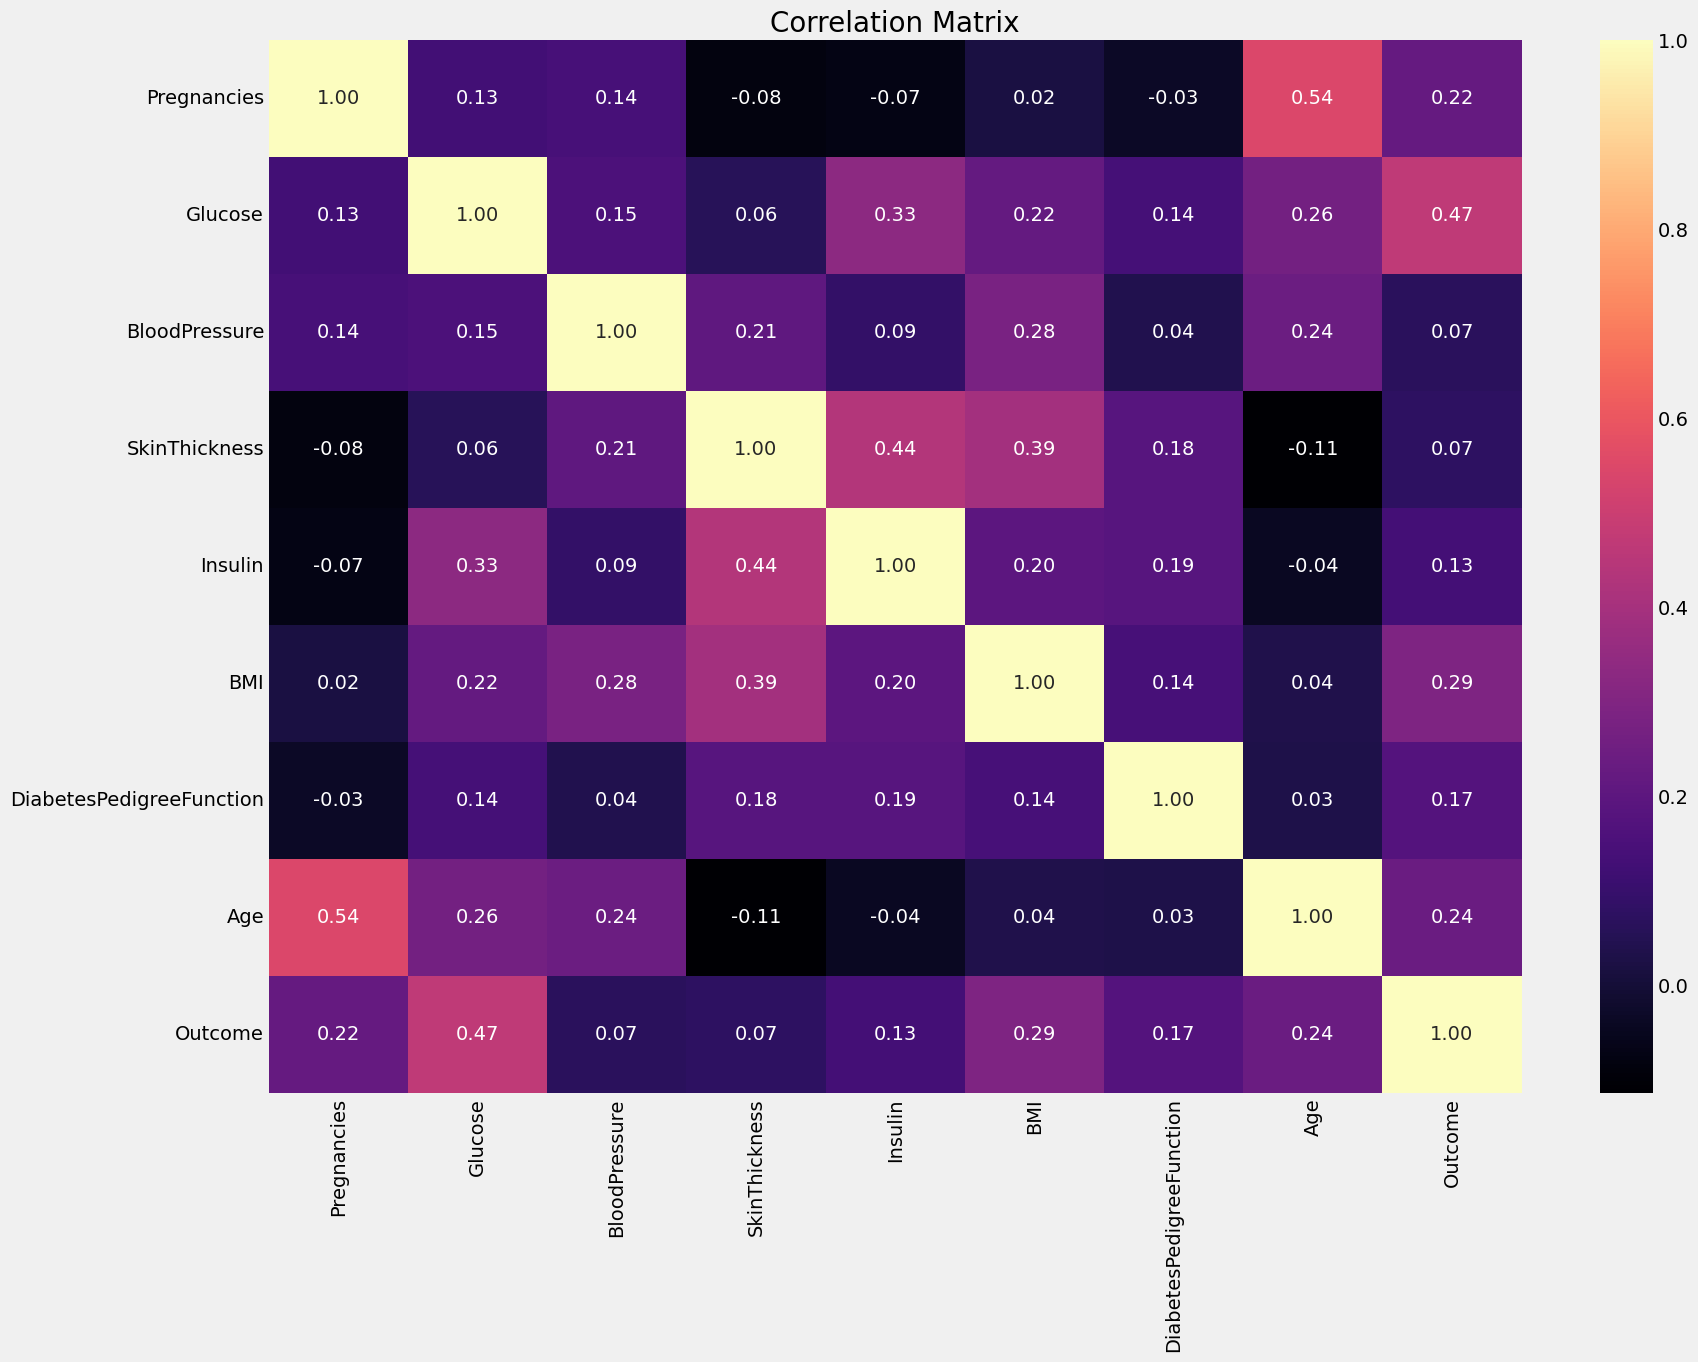

In [30]:
dia_dataframe.corr()

f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(dia_dataframe.corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show(block=True)

/tmp/ipykernel_18271/3450656173.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dia_dataframe['Insulin'])


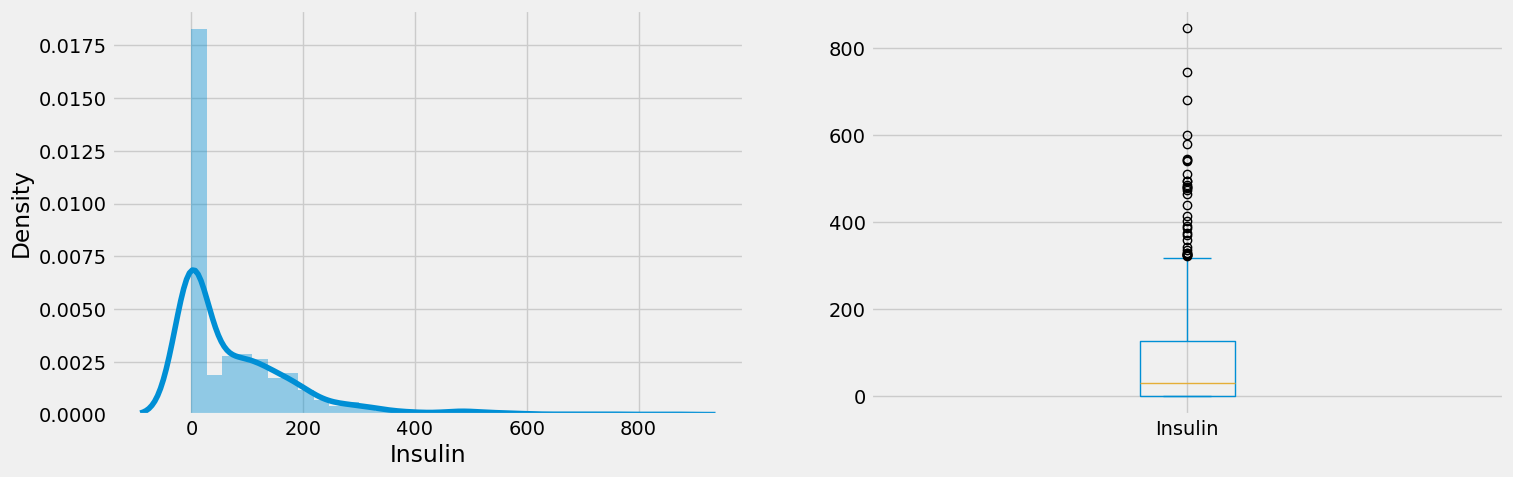

In [31]:
plt.subplot(121)
sns.distplot(dia_dataframe['Insulin'])
plt.subplot(122)
dia_dataframe['Insulin'].plot.box(figsize=(16,5))
plt.show()

**standardize value**

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x =pd.DataFrame(sc.fit_transform(dia_dataframe.drop(['Outcome'],axis=1)),
columns=['Pregnancies', 'Glucose','BloodPressure','SkinThickness', 'Insulin','BMI','DiabetesPedigreeFunction','Age'])
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


**show outcome value**

In [35]:
y = dia_dataframe.Outcome
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

**running train split test**

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.33, random_state=8)

**building random forest model**

In [39]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=500)

**training model accuracy**

In [41]:
rfc_train = rfc.predict(x_train)
from sklearn import metrics
print("training accuracy = ",format(metrics.accuracy_score(y_train, rfc_train)))

training accuracy =  1.0


**Prediction accuracy**

In [43]:
prediction = rfc.predict(x_test)
from sklearn import metrics
print("prediction accuracy = ",format(metrics.accuracy_score(y_test, prediction)))

prediction accuracy =  0.7559055118110236


**classification report after prediction**

In [45]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test,prediction))

[[144  20]
 [ 42  48]]
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       164
           1       0.71      0.53      0.61        90

    accuracy                           0.76       254
   macro avg       0.74      0.71      0.72       254
weighted avg       0.75      0.76      0.75       254



**Saving model**

In [47]:
import pickle
saved_model = pickle.dumps(rfc)
rfc_from_pickle = pickle.loads(saved_model)
rfc_from_pickle.predict(x_test)

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1])

In [48]:
dia_dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
